# 18_43

Исходная система
$$
\ddot{x} + 2 \dot{x} + x - y = 0 \\
\ddot{y} + \dot{y} + 3 y -x = 0
$$

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

In [71]:
w, x, y, x_d, y_d, x_dd, y_dd = smp.symbols(r'w x y \dot{x} \dot{y} \ddot{x} \ddot{y}')

q = smp.Matrix([x, y])
q_d = smp.Matrix([x_d, y_d])
q_dd = smp.Matrix([x_dd, y_dd])

### Матрицы A, B, C

In [72]:
A = smp.Matrix(np.eye(2).astype(np.int64))
A

Matrix([
[1, 0],
[0, 1]])

In [73]:
B = smp.Matrix([[2, 0], [0, 1]])
B

Matrix([
[2, 0],
[0, 1]])

In [74]:
C = smp.Matrix([[1, -1], [ -1, 3]])
C

Matrix([
[ 1, -1],
[-1,  3]])

In [75]:
A * q_dd + B * q_d + C * q

Matrix([
[\ddot{x} + 2*\dot{x} + x - y],
[\ddot{y} + \dot{y} - x + 3*y]])

### Матрица D

In [76]:
D = A * ((1j * w)**2) + B * (1j * w) + C
D

Matrix([
[-1.0*w**2 + 2.0*I*w + 1,                      -1],
[                     -1, -1.0*w**2 + 1.0*I*w + 3]])

In [77]:
W = D.inv()
W

Matrix([
[(-1.0*w**2 + 1.0*I*w + 3.0)/(1.0*w**4 - 3.0*I*w**3 - 6.0*w**2 + 7.0*I*w + 2.0),                         1.0/(1.0*w**4 - 3.0*I*w**3 - 6.0*w**2 + 7.0*I*w + 2.0)],
[                          -1/(-1.0*w**4 + 3.0*I*w**3 + 6.0*w**2 - 7.0*I*w - 2), (-1.0*w**2 + 2.0*I*w + 1.0)/(1.0*w**4 - 3.0*I*w**3 - 6.0*w**2 + 7.0*I*w + 2.0)]])

In [78]:
AFHR_1 = smp.lambdify(w, W[1, 0])
AFHR_2 = smp.lambdify(w, W[1, 1])

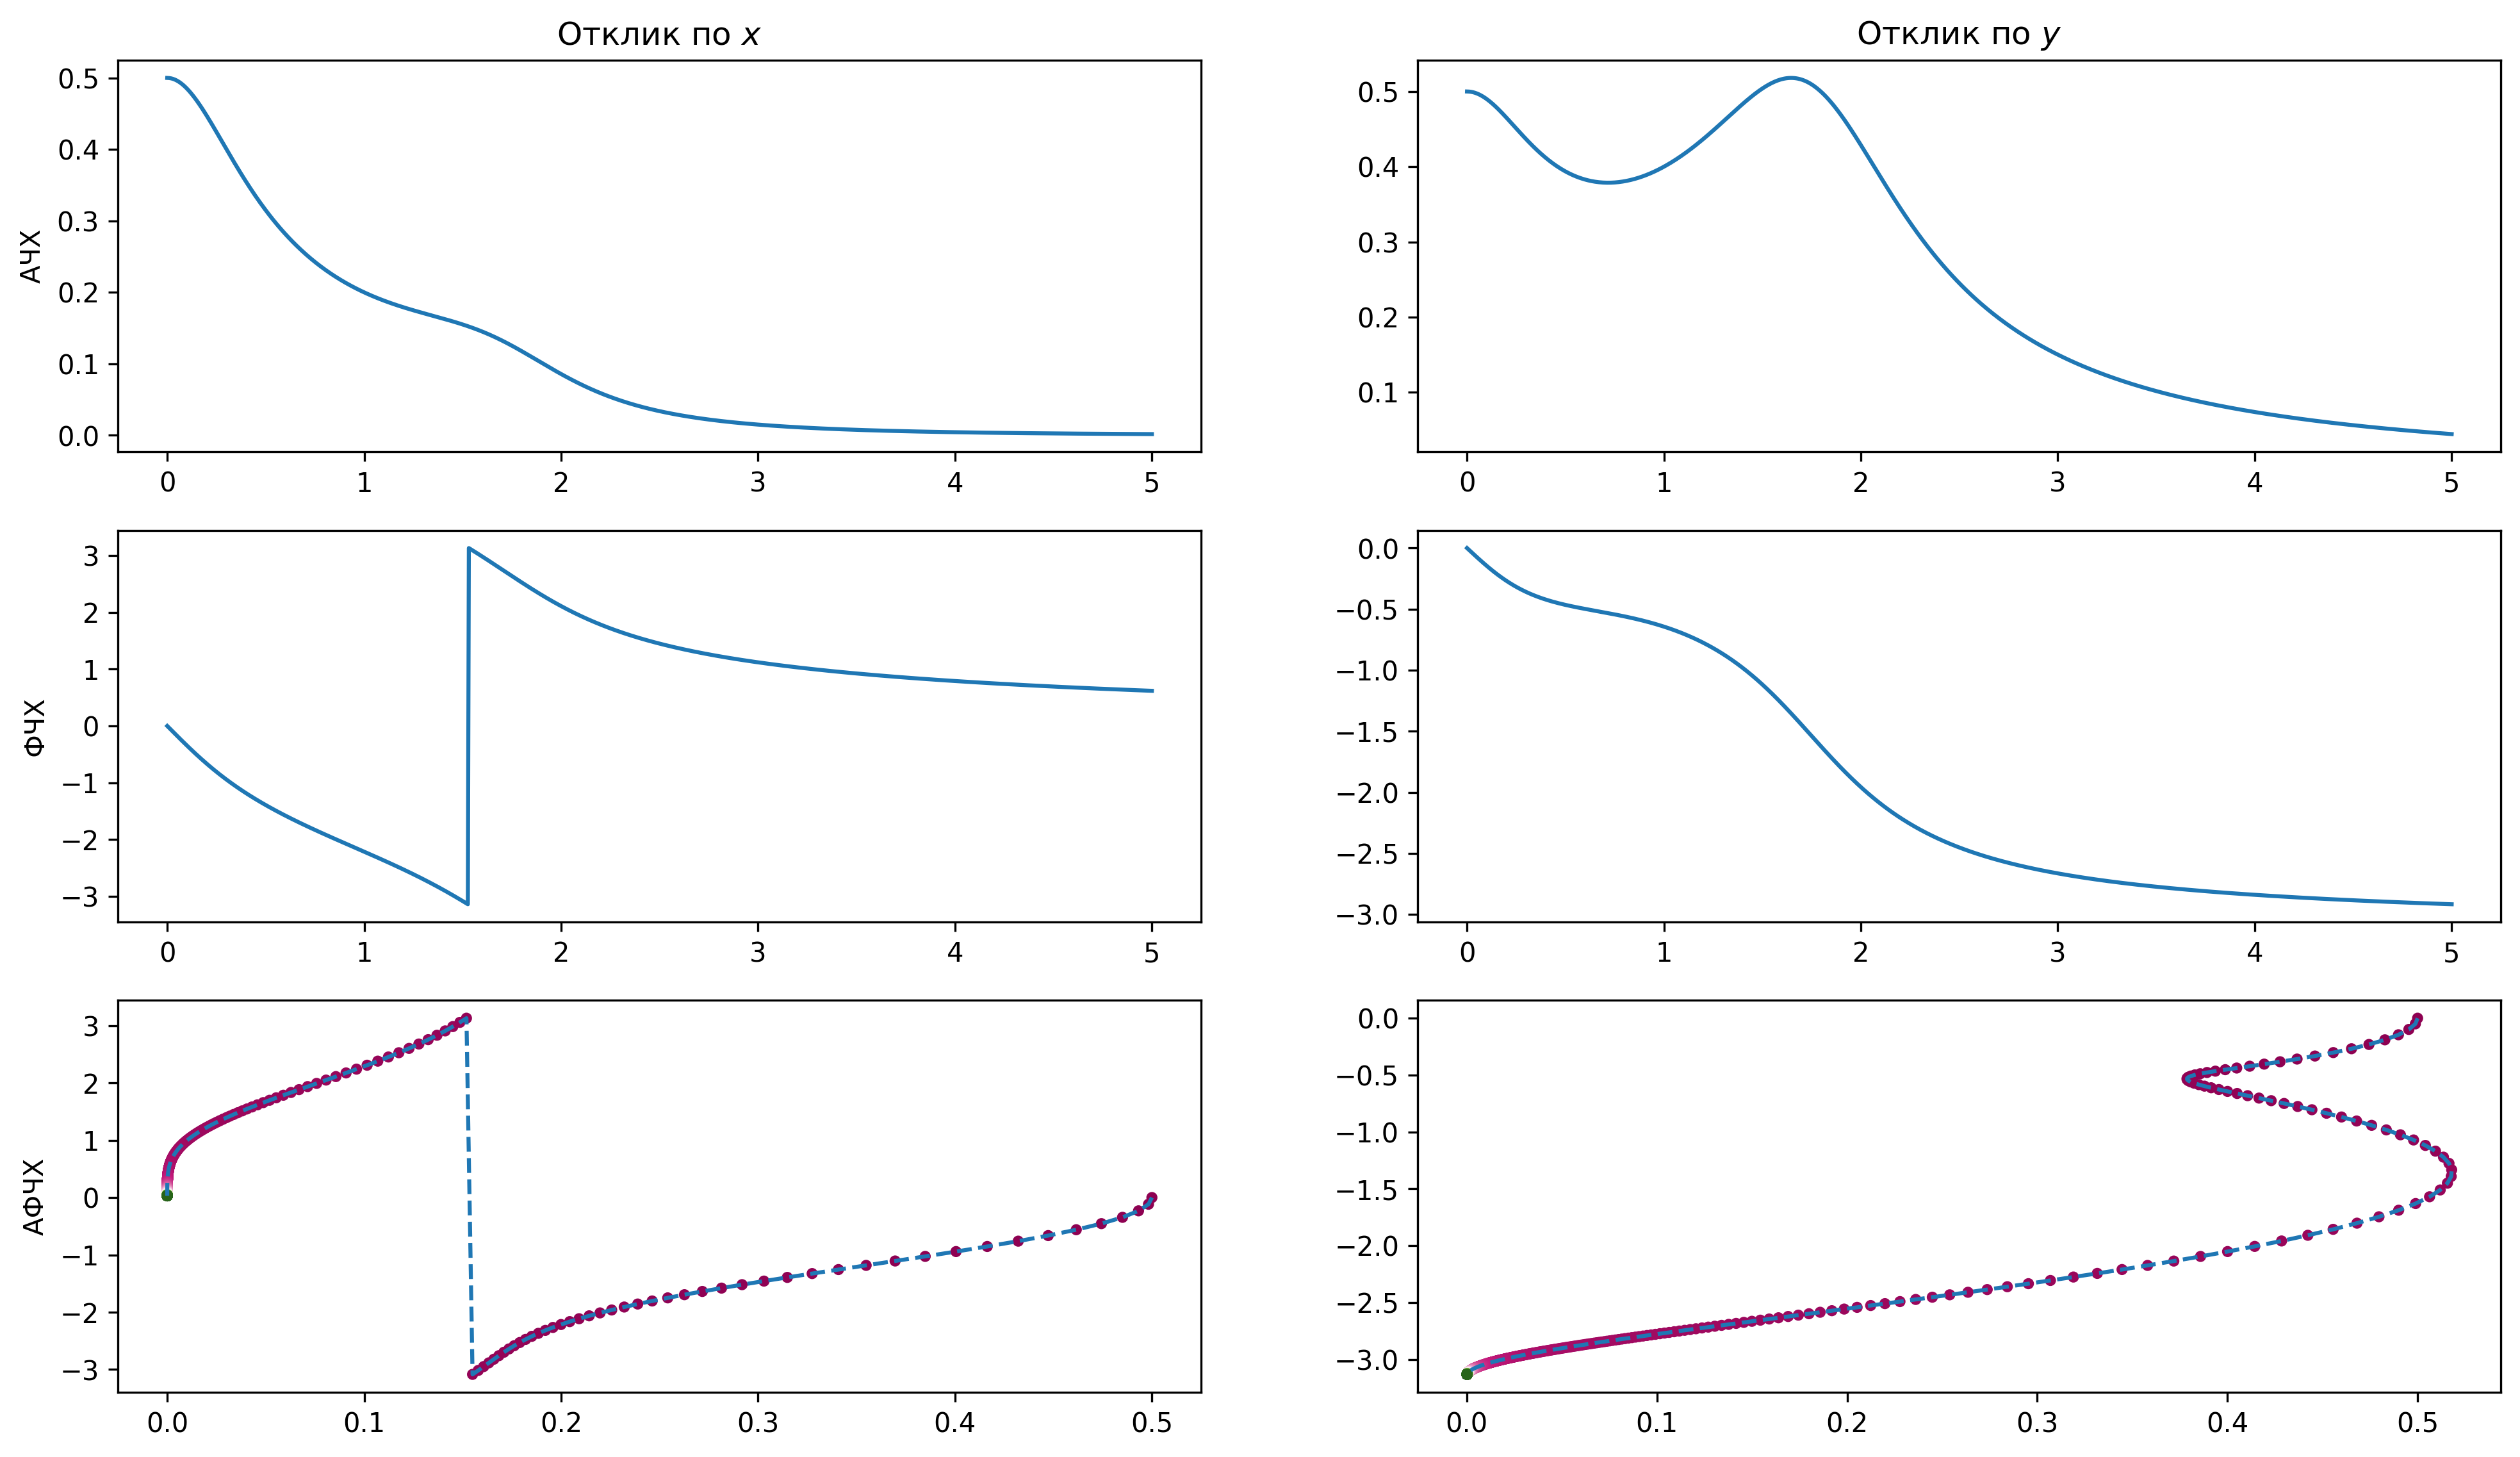

In [79]:
fig, ax = plt.subplots(3, 2, figsize = (16, 9), dpi = 300)

w = np.linspace(0, 5, 1000)
wBig = np.linspace(0, 100, 3000)

ax[0, 0].set_title("Отклик по $x$")
ax[0, 0].plot(w, np.abs(AFHR_1(w)))
ax[0, 0].set_ylabel("АЧХ")
ax[1, 0].set_ylabel("ФЧХ")
ax[1, 0].plot(w, np.angle(AFHR_1(w)))
ax[2, 0].scatter(np.abs(AFHR_1(wBig)), 
                 np.angle(AFHR_1(wBig)), 
                 cmap = 'PiYG', 
                 c = wBig / 100, 
                 s = 10)
ax[2, 0].plot(np.abs(AFHR_1(wBig)), 
                 np.angle(AFHR_1(wBig)),
                 linestyle = '--')
ax[2, 0].set_ylabel("АФЧХ")

ax[0, 1].set_title("Отклик по $y$")
ax[1, 1].plot(w, np.angle(AFHR_2(w)))
ax[0, 1].plot(w, np.abs(AFHR_2(w)))
ax[2, 1].scatter(np.abs(AFHR_2(wBig)), 
                 np.angle(AFHR_2(wBig)), 
                 cmap = 'PiYG', 
                 c = wBig / 100, 
                 s = 10)
ax[2, 1].plot(np.abs(AFHR_2(wBig)), 
                 np.angle(AFHR_2(wBig)),
                 linestyle = '--')
plt.savefig("18_43Plot.png")